#### ANALYSIS SCRIPT - SCHOTTKY DIODE

-  Important: Load data as csv
- use ';' as delimiter 
- use ',' as decimal

Note: The Data had to be seperated in a specific way, since each dataset contained additional data which could not be used. 

### Import 

In [2]:
import matplotlib.pyplot as plt 
import scipy as scipy
import scipy.stats as stats
import numpy as np 
import pandas as pd 
import scipy.interpolate as interpolate
import math
import seaborn as sns
from shapely.geometry import  LineString
from tkinter.filedialog import askopenfilenames

%matplotlib inline

In [3]:
#### delete comment to display whole columns in script

# pd.set_option ('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_colwidth', None)

### Import data


In [4]:
filenames = askopenfilenames(title = 'Open files')
for filename in filenames: 
    filename1 = filename.split('/')[4].split('.')[0] #split path to only get filename
    globals()[filename1]= pd.read_csv(filename, delimiter = ';', decimal = ',') #read files
    ###globals()[filename1] = globals()[filename1][ globals()[filename1]["Voltage / V"].str.contains("Voltage / V") == False] #Remove additional header cells (in data set)
    
    globals()[filename1] = globals()[filename1].rename(columns = {'Voltage / V':'Voltage[V]', 'Current / A':'Current[A]' })
    globals()[filename1] = globals()[filename1].reset_index(drop = True)
    ###### data can now be displayed by i.e. 'Schottky10'


In [5]:
lst_df = []
lst_df_names = []
frames = {}
Frame = pd.DataFrame()

for filename in filenames: 
    filename1 = filename.split('/')[10].split('.')[0]
    label = filename1
    globals()[filename1] = pd.read_csv(filename, delimiter = ';', decimal = ',')

    globals()[filename1] = globals()[filename1].rename(columns = {'Voltage / V':'Voltage[V]', 'Current / A':'Current[A]' })
    globals()[filename1] = globals()[filename1].reset_index(drop = True)

    for k, d in globals()[filename1].groupby(globals()[filename1]['Voltage[V]'].str.startswith('Voltage /').fillna(0).cumsum()): 
        if globals()[filename1]['Voltage[V]'].str.contains('Voltage /').any() == True: 

            sub_df = pd.DataFrame(d.iloc[1:].to_numpy(), columns=d.iloc[0].to_numpy()) 
            sub_df = sub_df.set_axis(['Voltage[V]', 'Current[A]'], axis=1, inplace=False)
            #sub_df =sub_df.reset_index(inplace = True)
        else: 
            sub_df = pd.DataFrame(d.to_numpy(), columns=d.to_numpy()) 
            frame = sub_df
        
        if len(sub_df) == 180: 
            sub_df = sub_df.tail(-1)

        sub_df = sub_df.reset_index(drop = True)
        sub_df.name = filename1 + ('_'+str(k))
        lst_df.append(sub_df) #append data to list (floats) - list of dataframes
        
        lst_df_names.append(sub_df.name) #append name of dataframes to list (strings)

        sub_df.rename(columns = {'Voltage[V]': (filename1 + ('_'+str(k) +'_Volt')),'Current[A]': (filename1 + ('_'+str(k) +'_Curr')) }, inplace = True)
        sub_df.reset_index(drop = True, inplace=True)
        
    Frame = pd.concat(lst_df, axis = 1)
    #Frame
    print(sub_df)

##### IGNORE ERROR MESSAGE


    Schottky10_1_Volt Schottky10_1_Curr
0           0.0209565       3.63588e-06
1           0.0219615       4.01735e-06
2           0.0229609       4.25577e-06
3           0.0239618       4.60148e-06
4           0.0249674       4.97103e-06
..                ...               ...
174          0.194972        0.00574992
175          0.195972        0.00592158
176          0.196976        0.00609711
177          0.197982        0.00627649
178          0.198947        0.00645329

[179 rows x 2 columns]
    Schottky15_1_Volt Schottky15_1_Curr
0           0.0209527       5.97239e-06
1           0.0219548       6.41346e-06
2            0.022958       7.10487e-06
3            0.023958       7.61747e-06
4           0.0249636       8.16584e-06
..                ...               ...
174          0.194975        0.00739269
175          0.195976        0.00759518
176          0.196979        0.00780128
177          0.197979        0.00801107
178          0.198954        0.00821688

[179 rows x 2 c

AttributeError: Can only use .str accessor with string values!

In [6]:
%matplotlib auto

cleared_df = Frame
Frame.columns = Frame.columns.str.replace('10_1', '10_2').str.replace('15_1', '15_2').str.replace('20_1', '20_2')

for col in cleared_df.columns: 
    # print(col)
    if '_1' in col:
        cleared_df =cleared_df.drop(col, axis = 1)
    elif '_0' in col: 
        cleared_df = cleared_df.drop(col, axis = 1)
#cleared_df

for col in cleared_df.columns: 
    if 'Volt' in col: 
        x = cleared_df[col]
    
    elif 'Curr' in col: 
        y = cleared_df[col]
        plt.ylabel('Current [I]')
        plt.xlabel('Voltage [V]')
        plt.title('Temperature dependent I-U-Curves')
        plt.plot(x.astype(float),y.astype(float), label = str(col).replace('_Curr', '').replace('25_2', '25_3').replace('30_2', '30_3').replace('35_2', '35_3').replace('40_2', '40_3').replace('45_2', '45_3').replace('50_2', '50_3').replace('55_2', '55_3').replace('60_2', '60_3').replace('65_2', '65_3'))
        plt.legend()
   
plt.show()

Using matplotlib backend: <object object at 0x0000017C7B06A1B0>


In [7]:
cleared_df #display

Schottky10_2_Volt Schottky10_2_Curr Schottky15_2_Volt Schottky15_2_Curr  \
0           0.0209565       3.63588e-06         0.0209527       5.97239e-06   
1           0.0219615       4.01735e-06         0.0219548       6.41346e-06   
2           0.0229609       4.25577e-06          0.022958       7.10487e-06   
3           0.0239618       4.60148e-06          0.023958       7.61747e-06   
4           0.0249674       4.97103e-06         0.0249636       8.16584e-06   
..                ...               ...               ...               ...   
174          0.194972        0.00574992          0.194975        0.00739269   
175          0.195972        0.00592158          0.195976        0.00759518   
176          0.196976        0.00609711          0.196979        0.00780128   
177          0.197982        0.00627649          0.197979        0.00801107   
178          0.198947        0.00645329          0.198954        0.00821688   

    Schottky20_2_Volt Schottky20_2_Curr Schottky25_2_Volt Schottky25_2_Curr  \
0           0.0209403       1.03116e-05         0.0209501          1.67E-05   
1           0.0219443       1.10745e-05         0.0219531          1.80E-05   
2           0.0229464        1.1909e-05         0.0229566          1.92E-05   
3           0.0239544       1.25289e-05         0.0239565          2.05E-05   
4           0.0249538       1.35422e-05         0.0249603          2.19E-05   
..                ...               ...               ...               ...   
174          0.194975        0.00952071          0.194968         0.0118617   
175          0.195975        0.00975522           0.19597         0.0121269   
176          0.196977         0.0099937          0.196974         0.0123962   
177          0.197982         0.0102365          0.197976         0.0126676   
178          0.198948         0.0104732          0.198944         0.0129335   

    Schottky30_2_Volt Schottky30_2_Curr  ... Schottky40_2_Volt  \
0           0.0209591          2.62E-05  ...         0.0209539   
1           0.0219638          2.83E-05  ...         0.0219555   
2           0.0229604          3.02E-05  ...         0.0229547   
3           0.0239632          3.23E-05  ...         0.0239575   
4            0.024966          3.43E-05  ...           0.02496   
..                ...               ...  ...               ...   
174          0.194967         0.0144531  ...          0.194964   
175           0.19597         0.0147462  ...          0.195964   
176          0.196973         0.0150429  ...          0.196967   
177          0.197975          0.015342  ...          0.197969   
178          0.198947         0.0156327  ...           0.19894   

    Schottky40_2_Curr Schottky45_2_Volt Schottky45_2_Curr Schottky50_2_Volt  \
0            6.23E-05         0.0209415          9.36E-05          0.020952   
1            6.66E-05         0.0219448       0.000100183         0.0219579   
2            7.12E-05         0.0229452        0.00010699         0.0229573   
3            7.59E-05          0.023947       0.000113738         0.0239575   
4            8.09E-05         0.0249491       0.000121033         0.0249608   
..                ...               ...               ...               ...   
174         0.0203231           0.19496         0.0235401          0.194973   
175         0.0206639           0.19596         0.0238994          0.195977   
176         0.0210069          0.196963         0.0242604          0.196979   
177         0.0213521           0.19797          0.024625          0.197983   
178         0.0216871          0.198933         0.0249781           0.19895   

    Schottky50_2_Curr Schottky55_2_Volt Schottky55_2_Curr Schottky60_2_Volt  \
0         0.000138605          0.020946       0.000202084         0.0209599   
1         0.000148189         0.0219502       0.000215995          0.021961   
2         0.000158083         0.0229528       0.000230277         0.0229666   
3         0.000168443         0.0239558       0.

In [8]:
### save generated data
cleared_df.to_csv(r'C:\Users\sandr\OneDrive\2) AMS Master\AMS\3rd Semester\Research_lab\Devices\Data\cleared_data.csv', decimal=',', sep = ';') #safe cleared data as csv

INTERPOLATION AND FITS

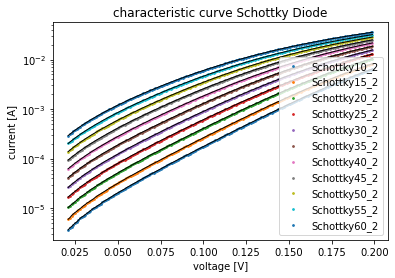

In [9]:
%matplotlib inline
lst_col = []
for col in cleared_df.columns: 
    if 'Volt' in col: 
        x = cleared_df[col].astype(float)
        
    elif 'Curr' in col: 
        y = cleared_df[col].astype(float)

        lst_col.append(col)
        t,c, k = interpolate.splrep(x,y,s=0, k=4)###create bspline
        spline = interpolate.BSpline(t,c,k)
        
        N = 180
        xmin, xmax = x.min(), x.max()
        xx = np.linspace(xmin, xmax, N)

        fit_x, fit_y= np.polyfit(x, np.log(y), 1)

        #get expontential fit parameters
        #gleichung aufstellen: 

        y_exp_fit = []
        for elemt in x: 
            y_ = (math.exp(fit_y)) * (math.exp(((fit_x)))**(elemt))
            y_exp_fit.append(y_)

        y_exp_fit = np.array(y_exp_fit)

        plt.semilogy(xx, spline(xx), linewidth = 1, color = 'black')
        plt.scatter(x,y ,  label =  str(col).replace('_Curr', ''), s =3)
    
        plt.title('characteristic curve Schottky Diode')
        plt.xlabel('voltage [V]')
        plt.ylabel('current [A]')
        
        plt.legend()
            

plt.show()

Plot Interpolation and Slope values

In [23]:
%matplotlib auto

slope_lst = []
for col in cleared_df.columns: 
    if 'Volt' in col: 
        x = cleared_df[col].astype(float)
        print(col)
    
    elif 'Curr' in col: 
        y = cleared_df[col].astype(float)

        t,c, k = interpolate.splrep(x,y,s=0, k=4)###create bspline
        spline = interpolate.BSpline(t,c,k)
        N = 180
        xmin, xmax = x.min(), x.max()
       # print(col)
        xx = np.linspace(xmin, xmax, N)

        #plt.scatter(x,y,  label =  str(col).replace('_Curr', ''), s = 7, color = 'black')
        #plt.plot(

        plt.semilogy(xx, spline(xx), label = str(col).replace('_Curr', ''))
        plt.legend()

        fit_x, fit_y= np.polyfit(xx, np.log(spline(xx)), 1)
        #print(fit_x)

        #get expontential fit parameters

        #gleichung aufstellen: 
        y_exp_fit = []
        for elemt in xx: 
            y_ = (math.exp(fit_y)) * (math.exp(((fit_x)))**(elemt))
            y_exp_fit.append(y_)
        plt.ylabel('Current [I]')
        plt.xlabel('Voltage [V]')
        plt.title('I-V Curves with splines and fits in log-scale ')
        slope_lst.append(fit_x)
        y_exp_fit = np.array(y_exp_fit) #make sure its not the same fit for every curve
        plt.plot(xx, y_exp_fit, color = 'black', linestyle = '-',  linewidth=0.5)
        line_1 = LineString(np.column_stack((xx, (spline(xx)))))
        line_2 = LineString(np.column_stack((xx, y_exp_fit)))
        intersection = line_1.intersection(line_2)
        #print(intersection)
        print(fit_x)
        #plt.semilogy(x,y, color = 'green')
plt.show()

Using matplotlib backend: QtAgg
Schottky10_2_Volt
40.75536207440973
Schottky15_2_Volt
39.55048090665834
Schottky20_2_Volt
38.11943212349697
Schottky25_2_Volt
36.68468923405201
Schottky30_2_Volt
35.221711053945555
Schottky35_2_Volt
33.668914710178335
Schottky40_2_Volt
32.11244499779887
Schottky45_2_Volt
30.492168582892596
Schottky50_2_Volt
28.87934980050877
Schottky55_2_Volt
27.24620340009753
Schottky60_2_Volt
25.63216411262958


Plot only first and last measurement for better comparison

In [40]:
%matplotlib auto

slope_lst = []
for col in cleared_df.columns: 
    if '10_2_Volt' in col  or  '60_2_Volt' in col: 
        x = cleared_df[col].astype(float)
        print(col)
    
    elif '10_2_Curr' in col or '60_2_Curr' in col: 
        y = cleared_df[col].astype(float)

        t,c, k = interpolate.splrep(x,y,s=0, k=4)###create bspline
        spline = interpolate.BSpline(t,c,k)
        N = 180
        xmin, xmax = x.min(), x.max()

        xx = np.linspace(xmin, xmax, N)
        plt.semilogy(xx, spline(xx), label = str(col).replace('_Curr', ''))
        plt.legend()

        fit_x, fit_y= np.polyfit(xx, np.log(spline(xx)), 1)

        #get expontential fit parameters

        #gleichung aufstellen: 
        y_exp_fit = []
        for elemt in xx: 
            y_ = (math.exp(fit_y)) * (math.exp(((fit_x)))**(elemt))
            y_exp_fit.append(y_)
        plt.ylabel('Current [I]')
        plt.xlabel('Voltage [V]')
        plt.title('Comparison high and low Temperature measurements')
        slope_lst.append(fit_x)
        y_exp_fit = np.array(y_exp_fit) #make sure its not the same fit for every curve
        plt.plot(xx, y_exp_fit, color = 'black')
        line_1 = LineString(np.column_stack((xx, (spline(xx)))))
        line_2 = LineString(np.column_stack((xx, y_exp_fit)))
        intersection = line_1.intersection(line_2)
        #print(intersection)
        print(fit_x)

        ## get parameters   

        #plt.semilogy(x,y, color = 'green')
plt.show()

Using matplotlib backend: QtAgg
Schottky10_2_Volt
40.75536207440973
Schottky60_2_Volt
25.63216411262958


In [12]:
x_df = pd.DataFrame(xx)
x_df.to_csv(r'C:\Users\sandr\OneDrive\2) AMS Master\AMS\3rd Semester\Research_lab\Devices\Data\x10.csv', decimal=',', sep = ';') 

Schottky10_2_Volt
40.75536207440973


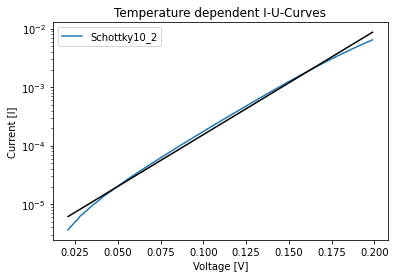

In [13]:
%matplotlib inline

slope_lst = []
for col in cleared_df.columns: 
    if '10_2_Volt'  in col: 
        x = cleared_df[col].astype(float)
        print(col)
    
    elif '10_2_Curr'  in col: 
        y = cleared_df[col].astype(float)

        t,c, k = interpolate.splrep(x,y,s=0, k=4)###create bspline
        spline = interpolate.BSpline(t,c,k)
        N = 180
        xmin, xmax = x.min(), x.max()

        xx = np.linspace(xmin, xmax, N)
        plt.semilogy(xx, spline(xx), label = str(col).replace('_Curr', ''))
        plt.legend()

        fit_x, fit_y= np.polyfit(xx, np.log(spline(xx)), 1)

        #get expontential fit parameters

        #gleichung aufstellen: 
        y_exp_fit = []
        for elemt in xx: 
            y_ = (math.exp(fit_y)) * (math.exp(((fit_x)))**(elemt))
            y_exp_fit.append(y_)
        plt.ylabel('Current [I]')
        plt.xlabel('Voltage [V]')
        plt.title('Temperature dependent I-U-Curves')
        slope_lst.append(fit_x)
        y_exp_fit = np.array(y_exp_fit) #make sure its not the same fit for every curve
        plt.plot(xx, y_exp_fit, color = 'black')
        line_1 = LineString(np.column_stack((xx, (spline(xx)))))
        line_2 = LineString(np.column_stack((xx, y_exp_fit)))
        intersection = line_1.intersection(line_2)
        #print(intersection)
        print(fit_x)

        ## get parameters   

        #plt.semilogy(x,y, color = 'green')
plt.show()

Note: The ideality factor it calculated by the reciprocal of the Voltage at a certain temperature and the slope of the linear part of the IV curve - from measurement

calulation of VT: 

VT = (kT)/q

In [25]:
lst_temp = np.linspace(10,60,11)
lst_temp
lst_vt = []
for a in lst_temp: 
    VT = (1.381*(10**-23) * (273.15+a))/(1.602*(10**-19))
    lst_vt.append(VT)
    print(VT)

0.024408873283395756
0.024839897003745316
0.025270920724094877
0.025701944444444444
0.026132968164794004
0.026563991885143568
0.02699501560549313
0.027426039325842696
0.027857063046192256
0.028288086766541824
0.028719110486891384


In [26]:
df_val = pd.DataFrame()
for i in range(len(lst_temp)): 
    n = 1/(slope_lst[i]*lst_vt[i])
    frame = pd.DataFrame({(str(lst_col[i]).replace('_Curr', '')): slope_lst[i]}, index = ['slope'])
    frame.loc['V_T'] = [lst_vt[i]]
    frame.loc['ideality factor'] = [n]
    ind = pd.DataFrame({'value': ['slope', 'V_t', 'n']})

    frame.reset_index(drop = True,inplace=True)
    df_val.reset_index(drop = True, inplace = True)
    df_val = pd.concat([df_val, frame, ind], axis = 1)
    df_val= df_val.set_index('value')
df_val

    

Schottky10_2  Schottky15_2  Schottky20_2  Schottky25_2  Schottky30_2  \
value                                                                         
slope     40.755362     39.550481     38.119432     36.684689     35.221711   
V_t        0.024409      0.024840      0.025271      0.025702      0.026133   
n          1.005235      1.017884      1.038084      1.060594      1.086428   

       Schottky35_2  Schottky40_2  Schottky45_2  Schottky50_2  Schottky55_2  \
value                                                                         
slope     33.668915     32.112445     30.492169     28.879350     27.246203   
V_t        0.026564      0.026995      0.027426      0.027857      0.028288   
n          1.118092      1.153568      1.195773      1.243018      1.297449   

       Schottky60_2  
value                
slope     25.632164  
V_t        0.028719  
n          1.358450

In [27]:
df_val.to_csv(r'C:\Users\sandr\OneDrive\2) AMS Master\AMS\3rd Semester\Research_lab\Devices\Data\ideality_measurements.csv', decimal=',', sep = ';') #safe cleared data as csv

Theoretical slope and ideality factor 

In [28]:
kb = 1.381*(10**-23) 
q_ev = 1.602*(10**-19)
lst_slope_th = []

for a in lst_temp:
    slope_theory = q_ev/(kb*(a+273.15))
    lst_slope_th.append(slope_theory)

lst_slope_th
slope_lst

[40.75536207440973,
 39.55048090665834,
 38.11943212349697,
 36.68468923405201,
 35.221711053945555,
 33.668914710178335,
 32.11244499779887,
 30.492168582892596,
 28.87934980050877,
 27.24620340009753,
 25.63216411262958]

In [29]:
df_n_theory = pd.DataFrame()
for i in range(len(lst_temp)): 
    n1 = 1/(lst_slope_th[i]*lst_vt[i])
    frame1 = pd.DataFrame({(str(lst_col[i]).replace('_Curr','')): lst_slope_th[i]}, index = ['slope'])
    frame1.loc['V_T'] = [lst_vt[i]]
    frame1.loc['ideality factor'] = [n1]
    ind = pd.DataFrame({'value': ['slope', 'V_t', 'n']})

   
    frame1.reset_index(drop = True,inplace=True)
    df_n_theory.reset_index(drop = True, inplace = True)
    df_n_theory = pd.concat([df_n_theory, frame1, ind], axis = 1)
    df_n_theory= df_n_theory.set_index('value')
   
df_n_theory


Schottky10_2  Schottky15_2  Schottky20_2  Schottky25_2  Schottky30_2  \
value                                                                         
slope     40.968708     40.257816     39.571174     38.907562     38.265841   
V_t        0.024409      0.024840      0.025271      0.025702      0.026133   
n          1.000000      1.000000      1.000000      1.000000      1.000000   

       Schottky35_2  Schottky40_2  Schottky45_2  Schottky50_2  Schottky55_2  \
value                                                                         
slope     37.644944     37.043876     36.461699     35.897539     35.350570   
V_t        0.026564      0.026995      0.027426      0.027857      0.028288   
n          1.000000      1.000000      1.000000      1.000000      1.000000   

       Schottky60_2  
value                
slope     34.820020  
V_t        0.028719  
n          1.000000

In [30]:
df_n_theory.to_csv(r'C:\Users\sandr\OneDrive\2) AMS Master\AMS\3rd Semester\Research_lab\Devices\Data\ideality_theory.csv', decimal=',', sep = ';') #safe cleared data as csv

plot ideality factors: 


In [37]:
%matplotlib auto
plt.plot(list(lst_temp),df_val.T['n'], marker = 'o',linestyle = ':', mfc = 'red',mec = 'red', color = 'black', label = 'Calculated from measurements')
plt.plot(list(lst_temp),df_n_theory.T['n'], marker = '^', linestyle = ':',  mfc = 'b',mec = 'b', color = 'black',label = 'Calculated from theory')
plt.xlabel('Temperature [°C]')
plt.ylabel('ideality factor')
plt.legend()

plt.show()

Using matplotlib backend: QtAgg


All together for protocol

Schottky10_2_Volt
40.75536207440973
Schottky15_2_Volt
39.55048090665834
Schottky20_2_Volt
38.11943212349697
Schottky25_2_Volt
36.68468923405201
Schottky30_2_Volt
35.221711053945555
Schottky35_2_Volt
33.668914710178335
Schottky40_2_Volt
32.11244499779887
Schottky45_2_Volt
30.492168582892596
Schottky50_2_Volt
28.87934980050877
Schottky55_2_Volt
27.24620340009753
Schottky60_2_Volt
25.63216411262958


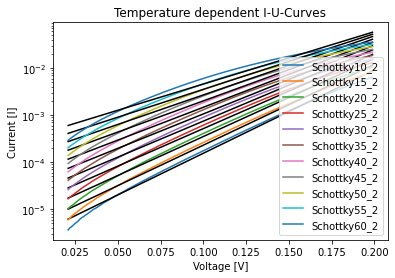

0.024408873283395756
0.024839897003745316
0.025270920724094877
0.025701944444444444
0.026132968164794004
0.026563991885143568
0.02699501560549313
0.027426039325842696
0.027857063046192256
0.028288086766541824
0.028719110486891384


Schottky10_2  Schottky15_2  Schottky20_2  Schottky25_2  Schottky30_2  \
value                                                                         
slope     40.755362     39.550481     38.119432     36.684689     35.221711   
V_t        0.024409      0.024840      0.025271      0.025702      0.026133   
n          1.005235      1.017884      1.038084      1.060594      1.086428   

       Schottky35_2  Schottky40_2  Schottky45_2  Schottky50_2  Schottky55_2  \
value                                                                         
slope     33.668915     32.112445     30.492169     28.879350     27.246203   
V_t        0.026564      0.026995      0.027426      0.027857      0.028288   
n          1.118092      1.153568      1.195773      1.243018      1.297449   

       Schottky60_2  
value                
slope     25.632164  
V_t        0.028719  
n          1.358450

In [36]:
%matplotlib inline

slope_lst = []
for col in cleared_df.columns: 
    if 'Volt' in col: 
        x = cleared_df[col].astype(float)
        print(col)
    
    elif 'Curr' in col: 
        y = cleared_df[col].astype(float)

        t,c, k = interpolate.splrep(x,y,s=0, k=4)###create bspline
        spline = interpolate.BSpline(t,c,k)
        N = 180
        xmin, xmax = x.min(), x.max()
       # print(col)
        xx = np.linspace(xmin, xmax, N)


        plt.semilogy(xx, spline(xx), label = str(col).replace('_Curr', ''))
        plt.legend()

        fit_x, fit_y= np.polyfit(xx, np.log(spline(xx)), 1)
        #print(fit_x)

        #get expontential fit parameters

        #gleichung aufstellen: 
        y_exp_fit = []
        for elemt in xx: 
            y_ = (math.exp(fit_y)) * (math.exp(((fit_x)))**(elemt))
            y_exp_fit.append(y_)
        plt.ylabel('Current [I]')
        plt.xlabel('Voltage [V]')
        plt.title('Temperature dependent I-U-Curves')
        slope_lst.append(fit_x)
        y_exp_fit = np.array(y_exp_fit) #make sure its not the same fit for every curve
        plt.plot(xx, y_exp_fit, color = 'black')
        line_1 = LineString(np.column_stack((xx, (spline(xx)))))
        line_2 = LineString(np.column_stack((xx, y_exp_fit)))
        intersection = line_1.intersection(line_2)
        #print(intersection)
        print(fit_x)
        #plt.semilogy(x,y, color = 'green')
plt.show()


lst_temp = np.linspace(10,60,11)
lst_temp
lst_vt = []
for a in lst_temp: 
    VT = (1.381*(10**-23) * (273.15+a))/(1.602*(10**-19))
    lst_vt.append(VT)
    print(VT)

df_val = pd.DataFrame()
for i in range(len(lst_temp)): 
    n = 1/(slope_lst[i]*lst_vt[i])
    frame = pd.DataFrame({(str(lst_col[i]).replace('_Curr', '')): slope_lst[i]}, index = ['slope'])
    frame.loc['V_T'] = [lst_vt[i]]
    frame.loc['ideality factor'] = [n]
    ind = pd.DataFrame({'value': ['slope', 'V_t', 'n']})

    frame.reset_index(drop = True,inplace=True)
    df_val.reset_index(drop = True, inplace = True)
    df_val = pd.concat([df_val, frame, ind], axis = 1)
    df_val= df_val.set_index('value')
    
df_val

    